## Install and Import Neccessary Packages

In [ ]:
# !pip install dask-expr
# !pip install s3fs
# !pip install boto3
# %pip install matplotlib
# !pip3 install scikit-learn
# %pip install dask
# %pip install seaborn
# %pip install tensorflow

In [18]:
import dask
from dask.distributed import Client
import dask.dataframe as dd
import boto3
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report
import time
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import pandas as pd
import numpy as np

## Connect to Client

In [35]:
client = Client('172.31.10.249:8786')

# Restart the client
client.restart()

print(client)

<Client: 'tcp://172.31.10.249:8786' processes=1 threads=1, memory=3.81 GiB>


In [36]:
workers = client.scheduler_info()['workers']
print("Number of workers:", len(workers))

# Optionally, print details about each worker
for worker, details in workers.items():
    print(f"Worker {worker}:")
    print("  - Host:", details['host'])
    print("  - Number of threads:", details['nthreads'])
    print("  - Memory limit:", details['memory_limit'], "bytes")


Number of workers: 1
Worker tcp://172.31.10.174:43531:
  - Host: 172.31.10.174
  - Number of threads: 1
  - Memory limit: 4095528960 bytes


In [37]:
s3 = boto3.client('s3') # connect to s3

In [38]:
response = s3.list_objects_v2(Bucket='digit-dataset') # connect to s3 bucket

In [39]:
for obj in response['Contents']: # show bucket contents
    print(obj['Key'])

digits.csv
multi-digit.csv


In [40]:
s3_path = 's3://digit-dataset/digits.csv'

In [41]:
# !pip install pickleshare

In [42]:
import os
os.chdir('/home/ubuntu')

In [43]:
cd '/home/ubuntu'

/home/ubuntu


In [44]:
ls

Big_Data_Project.ipynb  digits.csv


In [45]:
df = dd.read_csv(s3_path).sample(frac=0.5)  # Large dataset, use only part

In [46]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [47]:
sampled_df.info()

<class 'dask_expr.DataFrame'>
Columns: 65 entries, pixel_0_0 to target
dtypes: float64(64), int64(1)

## Split Data

In [48]:
import dask.array as da
import dask.dataframe as dd
from sklearn.datasets import load_digits

In [49]:
# !pip install dask_ml

In [50]:
X = df.drop(columns=['target']).compute()  # Features
y = df['target'].compute()  # Target variable

In [52]:
X_dask = da.from_array(X.values.reshape(-1, 8, 8, 1), chunks=(1000, 8, 8, 1))
y_dask = da.from_array(y.values, chunks=(1000,))

In [58]:
X_flattened = X_dask.reshape(X_dask.shape[0], -1).compute()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y_dask, test_size=0.2, random_state=42)

## KNN Model

In [60]:
%%time
knn = KNeighborsClassifier(n_neighbors=5)

CPU times: user 13 µs, sys: 1 µs, total: 14 µs
Wall time: 17.2 µs


In [62]:
%%time
# fit KNN model
knn.fit(X_train, y_train)

CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 34.6 ms


KNeighborsClassifier()

In [63]:
%%time
y_pred = knn.predict(X_test)

CPU times: user 31.4 ms, sys: 13 ms, total: 44.4 ms
Wall time: 60 ms


In [64]:
%%time
classification_report(y_test, y_pred)

CPU times: user 44.2 ms, sys: 7.45 ms, total: 51.6 ms
Wall time: 136 ms


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        12\n           1       0.96      0.96      0.96        25\n           2       0.95      1.00      0.97        19\n           3       1.00      0.94      0.97        16\n           4       1.00      1.00      1.00        15\n           5       0.94      1.00      0.97        16\n           6       1.00      1.00      1.00        28\n           7       0.95      1.00      0.97        18\n           8       0.93      0.93      0.93        15\n           9       1.00      0.88      0.93        16\n\n    accuracy                           0.97       180\n   macro avg       0.97      0.97      0.97       180\nweighted avg       0.97      0.97      0.97       180\n'

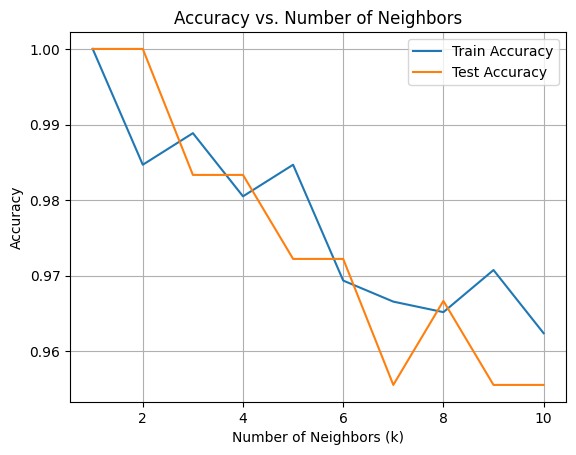

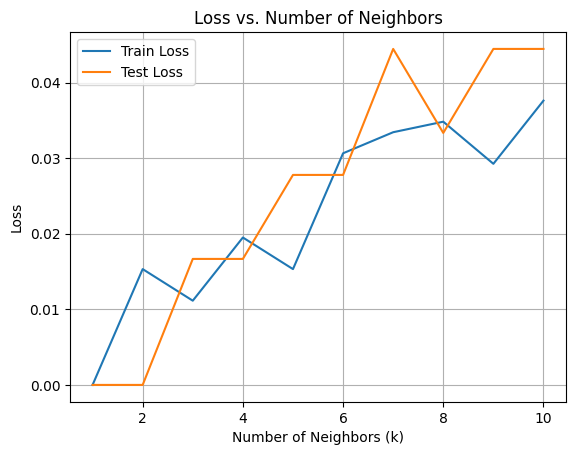

CPU times: user 1.93 s, sys: 146 ms, total: 2.07 s
Wall time: 4.65 s


In [66]:
%%time 
k_val = range(1,11)

# Initialize lists to store accuracy scores
train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []

# Iterate over each value of k
for k in k_val:

    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_loss.append(np.mean(train_pred != y_train))  # Classification error
    test_loss.append(np.mean(test_pred != y_test))  # Classification error

# Plot the accuracy scores
plt.plot(k_val, train_accuracy, label='Train Accuracy')
plt.plot(k_val, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid(True)

plt.show()
plt.plot(k_val, train_loss, label='Train Loss')
plt.plot(k_val, test_loss, label='Test Loss')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

## CNN Model

In [67]:
X_train_cnn = X_train.reshape(-1, 8, 8, 1).astype(np.float32)
X_test_cnn = X_test.reshape(-1, 8, 8, 1).astype(np.float32)

In [68]:
%%time
# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

CPU times: user 68.6 ms, sys: 0 ns, total: 68.6 ms
Wall time: 78.8 ms


/home/ubuntu/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
%%time
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

CPU times: user 7.86 ms, sys: 4.45 ms, total: 12.3 ms
Wall time: 10.8 ms


In [70]:
%%time
# Train the model
model.fit(X_train_cnn, y_train, epochs=10, batch_size=10,validation_data=(X_test_cnn, y_test))

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4372 - loss: 2.2326 - val_accuracy: 0.8333 - val_loss: 0.5612
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9391 - loss: 0.2913 - val_accuracy: 0.9389 - val_loss: 0.2519
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9599 - loss: 0.1556 - val_accuracy: 0.9389 - val_loss: 0.2143
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9692 - loss: 0.1108 - val_accuracy: 0.9611 - val_loss: 0.1346
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9893 - loss: 0.0681 - val_accuracy: 0.9556 - val_loss: 0.1061
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9960 - loss: 0.0413 - val_accuracy: 0.9611 - val_loss: 0.1160
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9997 - loss: 0.0274 - val_accuracy: 0.9722 - val_loss: 0.1301
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9992 - loss: 0.0254 - val_accuracy: 0.9667 - val_loss:

In [71]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9686 - loss: 0.0833  
Test accuracy: 0.9722222089767456, Test loss: 0.07749420404434204


In [72]:
%%time
# Make predictions on validation data
predictions = model.predict(X_test_cnn)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
CPU times: user 198 ms, sys: 8.98 ms, total: 207 ms
Wall time: 228 ms


2024-05-02 01:22:11,491 - distributed.client - WARNING - Couldn't gather 1 keys, rescheduling (('getitem-538764e8ef34b4752781504096b42cb0', 0),)


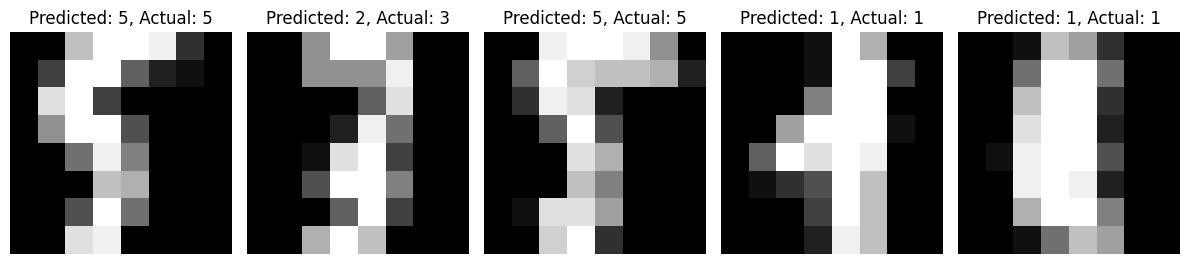

In [73]:
# Plot images in a grid
num_images_to_plot = 5
num_cols = 5  # Number of columns in the grid
num_rows = (num_images_to_plot - 1) // num_cols + 1  # Calculate number of rows needed

# Adjust figsize as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    if i < num_images_to_plot:
        # Plot the original image
        ax.imshow(X_test_cnn[i].reshape(8, 8), cmap='gray')
        ax.axis('off')
        
        # Get the predicted label for the current image
        predicted_label = np.argmax(predictions[i])
        
        # Get the actual label for the current image
        actual_label = y_test.compute()[i]
        
        # Set the title with predicted and actual labels
        ax.set_title(f"Predicted: {predicted_label}, Actual: {actual_label}")
    else:
        ax.axis('off')  # Turn off empty subplots

plt.tight_layout()  # Adjust spacing between subplots
plt.show()
